# Descrizione notebook
In questo notebook si fa una valutazione degli approcci UBCF e IBCF implementati precedentemente, e si fa un confronto fra i due.

In [1]:
# import delle librerie necessarie
import numpy as np
import pandas as pd
import math
import random
from itertools import combinations
from ipynb.fs.defs.creazione_CSV import normalization
from ipynb.fs.defs.UBCF import pearson_correlation_coefficient, score_user_item_ubcf, recommendation_ubcf
from ipynb.fs.defs.IBCF import cosine_similarity, score_user_item_ibcf, recommendation_ibcf
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 102)
# lettura della matrice con gli utenti che hanno valutato tutte le barzellette
complete_ratings = pd.read_csv('./data/complete_ratings_matrix.csv')

complete_ratings1 = complete_ratings.iloc[:50, :]
complete_ratings2 = complete_ratings.iloc[:100, :]
complete_ratings3 = complete_ratings.iloc[:200, :]

complete_ratings.head()

,user_id,number_of_jokes_rated,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,joke_10,joke_11,joke_12,joke_13,joke_14,joke_15,joke_16,joke_17,joke_18,joke_19,joke_20,joke_21,joke_22,joke_23,joke_24,joke_25,joke_26,joke_27,joke_28,joke_29,joke_30,joke_31,joke_32,joke_33,joke_34,joke_35,joke_36,joke_37,joke_38,joke_39,joke_40,joke_41,joke_42,joke_43,joke_44,joke_45,joke_46,joke_47,joke_48,joke_49,joke_50,joke_51,joke_52,joke_53,joke_54,joke_55,joke_56,joke_57,joke_58,joke_59,joke_60,joke_61,joke_62,joke_63,joke_64,joke_65,joke_66,joke_67,joke_68,joke_69,joke_70,joke_71,joke_72,joke_73,joke_74,joke_75,joke_76,joke_77,joke_78,joke_79,joke_80,joke_81,joke_82,joke_83,joke_84,joke_85,joke_86,joke_87,joke_88,joke_89,joke_90,joke_91,joke_92,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100
0,2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,-3.20,8.64,-2.14,0.10,9.03,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,6,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,-8.83,-7.91,1.07,-1.89,-6.36,-4.22,-9.27,-9.81,-7.82,-0.63,-6.31,-7.48,-6.07,-3.45,-3.20,0.53,-9.27,-9.56,-5.49,-1.12,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
2,8,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,5.68,-6.46,-4.42,-8.98,0.53,-1.26,-4.42,-8.93,8.93,-0.10,7.43,-4.51,-7.38,4.17,-9.03,-2.14,1.31,-5.68,-9.08,-6.21,2.48,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,-9.85,1.80,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
3,9,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,-2.91,-0.29,-4.85,-0.49,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29,3.98,-1.60,-0.29,1.21,3.79,2.91,4.85,2.28,0.97,-0.29,6.36,0.53,-0.29,4.66,3.35,0.97,-3.11,-1.84,4.42,-4.42,-1.41,1.41,-5.34,-6.99,1.41,5.10,1.84,-0.29,0.53,-0.29,-6.99,-3.54,6.36,1.84,3.35,-0.29,-0.29,-5.29,-6.89,-5.29,1.21,5.53,1.41,-6.50,4.85,4.85,2.62,1.41,6.36,1.41,-4.76,4.17,-2.04,-6.31,-0.29,-0.29,0.78,-0.29,-0.29,-0.29,-0.29,-3.20,-0.29,-3.20,-3.40,-0.29,-0.29,5.73,4.56,-2.23,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
4,12,100,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,-1.36,3.83,1.75,5.63,-2.86,-1.80,-2.04,5.53,-0.29,-0.58,1.36,2.43,0.63,-4.61,-4.37,-1.65,-1.36,7.57,-0.15,5.97,-3.50,0.24,4.27,-0.68,-3.79,7.62,5.15,2.43,0.10,0.83,-2.04,0.53,2.33,-2.28,-5.15,-0.58,-1.26,2.04,-1.41,2.38,6.60,2.04,-1.99,-2.77,-0.49,1.75,0.92,-6.89,-5.29,0.68,-2.38,-0.15,-0.24,1.46,-2.14,2.43,-2.43,-5.10,-0.49,0.15,-2.62,-2.91,1.12,1.70,0.00,2.04,3.06,-4.47,2.04,1.12,3.30,1.46,0.68,-2.57,-0.63,0.58,-0.63,1.89,2.38,6.21,-2.52,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66


# Preparazione Training set e Test set

In [3]:
def create_training_set(complete_ratings):
    test_set = []
    no_normalized_train_set = complete_ratings.copy(deep=True)  
    # per ogni riga (<indice_riga, riga>) e per ogni barzelletta della riga si salva la
    # coppia <nome_barzelletta, rating> in una lista (altrimenti si perde il riferimento al nome della barzelletta)
    # poi si prendono n coppie random, si salvano le informazioni nel test set, e si toglie dalla matrice completa
    # quello che si è preso almeno si ottiene il training set di conseguenza
    for index, row in no_normalized_train_set.iterrows():
        lst_app = []
        for i, elem in row[2:].items():
            lst_app.append((i, elem))
        lst_pair = random.sample(lst_app, 20)
        # pair = random.choice(lst_app)
        for pair in lst_pair:
            app = {}
            app["user_id"] = int(row["user_id"])
            app[pair[0]] = pair[1]
            test_set.append(app)
            no_normalized_train_set.loc[no_normalized_train_set["user_id"] == int(row["user_id"]), pair[0]] = np.nan
            no_normalized_train_set["number_of_jokes_rated"] = 80
    return (test_set, no_normalized_train_set) 

In [4]:
test_set1, no_normalized_train_set1 = create_training_set(complete_ratings1)
test_set1.sort(key=lambda x: (x["user_id"],int(list(x.keys())[1][5:])), reverse=False)
normalizated_train_set1 = no_normalized_train_set1.copy()   
normalizated_train_set1 = normalization(normalizated_train_set1)

In [5]:
test_set1

[{'user_id': 2, 'joke_2': -0.29},
 {'user_id': 2, 'joke_3': 6.36},
 {'user_id': 2, 'joke_10': 9.22},
 {'user_id': 2, 'joke_19': 3.3},
 {'user_id': 2, 'joke_25': 0.05},
 {'user_id': 2, 'joke_41': 7.82},
 {'user_id': 2, 'joke_43': 8.64},
 {'user_id': 2, 'joke_56': -3.2},
 {'user_id': 2, 'joke_57': 8.64},
 {'user_id': 2, 'joke_59': 0.1},
 {'user_id': 2, 'joke_66': -3.83},
 {'user_id': 2, 'joke_67': 8.74},
 {'user_id': 2, 'joke_70': 7.52},
 {'user_id': 2, 'joke_71': -5.0},
 {'user_id': 2, 'joke_74': 7.77},
 {'user_id': 2, 'joke_76': 6.21},
 {'user_id': 2, 'joke_90': 0.58},
 {'user_id': 2, 'joke_93': -0.29},
 {'user_id': 2, 'joke_94': 7.86},
 {'user_id': 2, 'joke_98': 0.34},
 {'user_id': 6, 'joke_3': 0.44},
 {'user_id': 6, 'joke_20': -6.12},
 {'user_id': 6, 'joke_22': -0.58},
 {'user_id': 6, 'joke_35': -1.55},
 {'user_id': 6, 'joke_36': -0.49},
 {'user_id': 6, 'joke_40': -7.04},
 {'user_id': 6, 'joke_42': -7.91},
 {'user_id': 6, 'joke_49': -7.82},
 {'user_id': 6, 'joke_52': -7.48},
 {'user_

In [6]:
no_normalized_train_set1.head()

,user_id,number_of_jokes_rated,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,joke_10,joke_11,joke_12,joke_13,joke_14,joke_15,joke_16,joke_17,joke_18,joke_19,joke_20,joke_21,joke_22,joke_23,joke_24,joke_25,joke_26,joke_27,joke_28,joke_29,joke_30,joke_31,joke_32,joke_33,joke_34,joke_35,joke_36,joke_37,joke_38,joke_39,joke_40,joke_41,joke_42,joke_43,joke_44,joke_45,joke_46,joke_47,joke_48,joke_49,joke_50,joke_51,joke_52,joke_53,joke_54,joke_55,joke_56,joke_57,joke_58,joke_59,joke_60,joke_61,joke_62,joke_63,joke_64,joke_65,joke_66,joke_67,joke_68,joke_69,joke_70,joke_71,joke_72,joke_73,joke_74,joke_75,joke_76,joke_77,joke_78,joke_79,joke_80,joke_81,joke_82,joke_83,joke_84,joke_85,joke_86,joke_87,joke_88,joke_89,joke_90,joke_91,joke_92,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100
0,2,80,4.08,NaN,NaN,4.37,-2.38,-9.66,-0.73,-5.34,8.88,NaN,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,NaN,-1.21,0.87,8.64,8.35,9.17,NaN,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,NaN,-3.83,NaN,8.98,-4.32,-3.20,-4.90,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.50,NaN,NaN,-2.14,NaN,9.03,-6.70,-3.35,-9.03,4.47,4.08,NaN,NaN,1.12,0.78,NaN,NaN,2.77,8.30,NaN,7.33,NaN,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,NaN,2.82,-4.95,NaN,NaN,-0.19,-2.14,3.06,NaN,-4.32,1.07
1,6,80,-6.17,-3.54,NaN,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.8,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,NaN,-3.01,NaN,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,NaN,NaN,-6.21,-8.06,-5.39,NaN,-8.83,NaN,1.07,-1.89,-6.36,-4.22,-9.27,-9.81,NaN,-0.63,-6.31,NaN,-6.07,-3.45,-3.20,0.53,-9.27,-9.56,-5.49,-1.12,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,NaN,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,NaN,-6.94,NaN,0.73,-6.21,NaN,-7.62,NaN,-0.29,-1.41,-3.93,NaN,NaN,NaN,-3.54,NaN,NaN,-2.96,-2.18,-3.35,0.05,-9.08,NaN,-3.45
2,8,80,6.84,NaN,9.17,-6.21,-8.16,NaN,9.27,1.41,-5.19,NaN,8.20,-7.86,NaN,-7.96,0.29,NaN,-7.09,-7.18,1.02,-0.29,NaN,-7.43,1.12,NaN,3.79,0.10,3.45,-3.45,7.57,NaN,NaN,9.27,NaN,-3.40,-5.44,1.60,NaN,3.01,-6.07,5.68,-6.46,-4.42,NaN,0.53,-1.26,-4.42,-8.93,8.93,NaN,7.43,-4.51,-7.38,4.17,-9.03,-2.14,1.31,-5.68,-9.08,NaN,NaN,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,NaN,1.80,-4.17,-2.38,NaN,-8.88,NaN,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,NaN,-1.12,-0.10,NaN,-3.16,-3.35,2.14,-0.05,1.31,0.00
3,9,80,-3.79,-3.54,-9.42,NaN,-8.74,-0.29,NaN,-8.93,-7.86,-1.6,-2.91,-0.29,-4.85,-0.49,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29,3.98,NaN,NaN,1.21,3.79,2.91,4.85,2.28,0.97,-0.29,6.36,NaN,-0.29,4.66,3.35,NaN,-3.11,-1.84,4.42,-4.42,NaN,1.41,-5.34,-6.99,1.41,NaN,NaN,-0.29,0.53,NaN,-6.99,-3.54,6.36,NaN,NaN,-0.29,-0.29,NaN,-6.89,-5.29,1.21,NaN,1.41,NaN,4.85,NaN,2.62,NaN,6.36,1.41,-4.76,4.17,-2.04,-6.31,-0.29,NaN,NaN,-0.29,-0.29,NaN,-0.29,-3.20,-0.29,-3.20,-3.40,-0.29,-0.29,5.73,4.56,-2.23,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
4,12,80,1.31,1.80,2.57,-2.38,NaN,0.73,-0.97,5.00,-7.23,NaN,3.83,1.75,5.63,-2.86,-1.80,NaN,5.53,NaN,NaN,1.36,2.43,0.63,-4.61,-4.37,-1.65,-1.36,7.57,-0.15,NaN,-3.50,0.24,4.27,-0.68,-3.79,7.62,NaN,2.43,0.10,0.83,-2.04,0.53,NaN,NaN,NaN,-0.58,-1.26,2.04,-1.41,2.38,6.60,2.04,-1.99,-2.77,-0.49,1.75,NaN,-6.89,-5.29,0.68,-2.38,NaN,-0.24,1.46,-2.14,2.43,-2.43,-5.10,NaN,0.15,-2.62,-2.91,NaN,1.70,0.00,2.04,3.06,NaN,2.04,1.12,NaN,1.46,0.68,-2.57,-0.63,0.58,-0.63,1.89,NaN,6.21,NaN,1.46,1.70,0.29,-3.30,NaN,5.44,4.08,2.48,NaN,4.66


In [7]:
normalizated_train_set1.head()

,user_id,number_of_jokes_rated,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,joke_10,joke_11,joke_12,joke_13,joke_14,joke_15,joke_16,joke_17,joke_18,joke_19,joke_20,joke_21,joke_22,joke_23,joke_24,joke_25,joke_26,joke_27,joke_28,joke_29,joke_30,joke_31,joke_32,joke_33,joke_34,joke_35,joke_36,joke_37,joke_38,joke_39,joke_40,joke_41,joke_42,joke_43,joke_44,joke_45,joke_46,joke_47,joke_48,joke_49,joke_50,joke_51,joke_52,joke_53,joke_54,joke_55,joke_56,joke_57,joke_58,joke_59,joke_60,joke_61,joke_62,joke_63,joke_64,joke_65,joke_66,joke_67,joke_68,joke_69,joke_70,joke_71,joke_72,joke_73,joke_74,joke_75,joke_76,joke_77,joke_78,joke_79,joke_80,joke_81,joke_82,joke_83,joke_84,joke_85,joke_86,joke_87,joke_88,joke_89,joke_90,joke_91,joke_92,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100
0,2,80,1.528875,NaN,NaN,1.818875,-4.931125,-12.211125,-3.281125,-7.891125,6.328875,NaN,4.198875,6.088875,1.868875,4.878875,2.008875,-3.521125,2.108875,-3.231125,NaN,-3.761125,-1.681125,6.088875,5.798875,6.618875,NaN,5.018875,2.158875,-1.681125,-2.941125,4.438875,3.948875,-3.471125,4.588875,6.478875,-4.351125,-1.821125,4.538875,0.848875,-3.421125,5.358875,NaN,-6.381125,NaN,6.428875,-6.871125,-5.751125,-7.451125,-3.471125,-4.011125,1.088875,0.608875,6.478875,-1.581125,-3.861125,-9.051125,NaN,NaN,-4.691125,NaN,6.478875,-9.251125,-5.901125,-11.581125,1.918875,1.528875,NaN,NaN,-1.431125,-1.771125,NaN,NaN,0.218875,5.748875,NaN,4.778875,NaN,5.168875,6.428875,6.088875,5.648875,1.378875,2.298875,2.298875,3.518875,6.428875,1.958875,-2.601125,1.138875,2.008875,NaN,0.268875,-7.501125,NaN,NaN,-2.741125,-4.691125,0.508875,NaN,-6.871125,-1.481125
1,6,80,-1.155250,1.47475,NaN,-3.485250,-2.075250,0.694750,-3.675250,4.144750,-1.635250,3.21475,-1.785250,-0.715250,0.014750,-3.575250,5.504750,-3.915250,1.324750,2.834750,2.734750,NaN,2.004750,NaN,2.634750,-2.755250,2.784750,2.734750,-0.225250,-0.515250,4.334750,-1.925250,1.084750,4.674750,-1.585250,-0.475250,NaN,NaN,-1.195250,-3.045250,-0.375250,NaN,-3.815250,NaN,6.08475,3.124750,-1.345250,0.794750,-4.255250,-4.795250,NaN,4.384750,-1.295250,NaN,-1.055250,1.564750,1.814750,5.544750,-4.255250,-4.545250,-0.47525,3.894750,-1.635250,2.154750,0.404750,-4.405250,-2.895250,-4.795250,-4.405250,-3.965250,NaN,-1.975250,-4.645250,-0.175250,0.014750,0.594750,-2.265250,-1.485250,NaN,-1.925250,NaN,5.744750,-1.195250,NaN,-2.605250,NaN,4.724750,3.604750,1.084750,NaN,NaN,NaN,1.474750,NaN,NaN,2.05475,2.834750,1.664750,5.064750,-4.065250,NaN,1.564750
2,8,80,9.006375,NaN,11.336375,-4.043625,-5.993625,NaN,11.436375,3.576375,-3.023625,NaN,10.366375,-5.693625,NaN,-5.793625,2.456375,NaN,-4.923625,-5.013625,3.186375,1.876375,NaN,-5.263625,3.286375,NaN,5.956375,2.266375,5.616375,-1.283625,9.736375,NaN,NaN,11.436375,NaN,-1.233625,-3.273625,3.766375,NaN,5.176375,-3.903625,7.846375,-4.293625,-2.253625,NaN,2.696375,0.906375,-2.253625,-6.763625,11.096375,NaN,9.596375,-2.343625,-5.213625,6.336375,-6.863625,0.026375,3.476375,-3.513625,-6.913625,NaN,NaN,-1.033625,-3.953625,-0.743625,-7.053625,-0.453625,-5.163625,-1.083625,-2.053625,-7.643625,0.076375,-7.733625,-1.623625,2.656375,-5.693625,NaN,3.966375,-2.003625,-0.213625,NaN,-6.713625,NaN,-2.393625,-3.273625,-3.803625,-7.733625,1.826375,-1.963625,2.066375,1.926375,-5.793625,NaN,1.046375,2.066375,NaN,-0.993625,-1.183625,4.306375,2.116375,3.476375,2.166375
3,9,80,-2.821250,-2.57125,-8.451250,NaN,-7.771250,0.678750,NaN,-7.961250,-6.891250,-0.63125,-1.941250,0.678750,-3.881250,0.478750,-7.771250,-6.021250,-7.771250,-1.941250,-2.381250,0.678750,4.948750,NaN,NaN,2.178750,4.758750,3.878750,5.818750,3.248750,1.938750,0.678750,7.328750,NaN,0.678750,5.628750,4.318750,NaN,-2.141250,-0.871250,5.388750,-3.451250,NaN,2.378750,-4.37125,-6.021250,2.378750,NaN,NaN,0.678750,1.498750,NaN,-6.021250,-2.571250,7.328750,NaN,NaN,0.678750,0.678750,NaN,-5.92125,-4.321250,2.178750,NaN,2.378750,NaN,5.818750,NaN,3.588750,NaN,7.328750,2.378750,-3.791250,5.138750,-1.071250,-5.341250,0.678750,NaN,NaN,0.6787

In [8]:
test_set2, no_normalized_train_set2 = create_training_set(complete_ratings2)
test_set2.sort(key=lambda x: (x["user_id"],int(list(x.keys())[1][5:])), reverse=False)
normalizated_train_set2 = no_normalized_train_set2.copy()   
normalizated_train_set2 = normalization(normalizated_train_set2)

In [9]:
test_set3, no_normalized_train_set3 = create_training_set(complete_ratings3)
test_set3.sort(key=lambda x: (x["user_id"],int(list(x.keys())[1][5:])), reverse=False)
normalizated_train_set3 = no_normalized_train_set3.copy()   
normalizated_train_set3 = normalization(normalizated_train_set3)

# Valutazione MAE

In [10]:
def mae(final, test_set): 
    t1 = 0 
    for i, j in zip(final, test_set):
        joke = ''
        for k in i.keys():
            if k.startswith('joke'):
                joke = k
        if joke in i and joke in j:
            t1+=abs(i[joke] - j[joke])
    return t1 / len(final)

# Valutazione RMSE

In [11]:
def rmse(final, test_set): 
    t1 = 0 
    for i, j in zip(final, test_set):
        joke = ''
        for k in i.keys():
            if k.startswith('joke'):
                joke = k
        if joke in i and joke in j:
            t1+=(i[joke] - j[joke]) * (i[joke] - j[joke])
    return np.sqrt(t1 / len(final))

# Raccomandazione UBCF

In [12]:
def ubcf(normalizated_train_set, no_normalized_train_set):
    final = []
    # per ogni utente nel training set
    for n in list(normalizated_train_set["user_id"]):
        lst = recommendation_ubcf(n, normalizated_train_set, no_normalized_train_set, True)
        final = final + lst
    return final

In [13]:
pred_ubcf1 = ubcf(normalizated_train_set1, no_normalized_train_set1)
pred_ubcf2 = ubcf(normalizated_train_set2, no_normalized_train_set2)
pred_ubcf3 = ubcf(normalizated_train_set3, no_normalized_train_set3)

In [14]:
pred_ubcf1

[{'user_id': 2, 'joke_2': 0},
 {'user_id': 2, 'joke_3': 0},
 {'user_id': 2, 'joke_10': 0},
 {'user_id': 2, 'joke_19': 0},
 {'user_id': 2, 'joke_25': 0},
 {'user_id': 2, 'joke_41': 0},
 {'user_id': 2, 'joke_43': 0},
 {'user_id': 2, 'joke_56': 0},
 {'user_id': 2, 'joke_57': 0},
 {'user_id': 2, 'joke_59': 0},
 {'user_id': 2, 'joke_66': 0},
 {'user_id': 2, 'joke_67': 0},
 {'user_id': 2, 'joke_70': 0},
 {'user_id': 2, 'joke_71': 0},
 {'user_id': 2, 'joke_74': 0},
 {'user_id': 2, 'joke_76': 0},
 {'user_id': 2, 'joke_90': 0},
 {'user_id': 2, 'joke_93': 0},
 {'user_id': 2, 'joke_94': 0},
 {'user_id': 2, 'joke_98': 0},
 {'user_id': 6, 'joke_3': -6.449440501773062},
 {'user_id': 6, 'joke_20': -2.5422515313278238},
 {'user_id': 6, 'joke_22': -6.874925842200311},
 {'user_id': 6, 'joke_35': -3.5067753338269116},
 {'user_id': 6, 'joke_36': -4.549},
 {'user_id': 6, 'joke_40': -7.9764892411236925},
 {'user_id': 6, 'joke_42': -8.450650651647738},
 {'user_id': 6, 'joke_49': -4.0659670761030196},
 {'user

# Raccomandazione IBCF

In [15]:
def ibcf(no_normalized_train_set, normalizated_train_set, complete_ratings):
    # si costruisce la matrice di similarità, ovvero una lista di coppie di item, per 
    # ogni coppia si specifica la similarità (ad -1 a 1)
    all_jokes = (list(no_normalized_train_set.columns))[2:]
    jokes_pairs = list(combinations(all_jokes, 2))
    similarity_matrix = []

    for i_1, i_2 in jokes_pairs:
        app = normalizated_train_set[[i_1, i_2]].dropna()
        similarity_matrix.append([i_1, i_2, cosine_similarity(app[i_1], app[i_2])])

    df = pd.DataFrame(similarity_matrix, columns = ['elem_1', 'elem_2', 'similarity'])
    df = df[df['similarity'] > 0.3]

    final_2 = []
    for n in list(complete_ratings["user_id"]):
        lst = recommendation_ibcf(n, no_normalized_train_set, df, True)
        final_2 = final_2 + lst
    return final_2

In [16]:
pred_ibcf1 = ibcf(no_normalized_train_set1, normalizated_train_set1, complete_ratings1)
pred_ibcf2 = ibcf(no_normalized_train_set2, normalizated_train_set2, complete_ratings2)
pred_ibcf3 = ibcf(no_normalized_train_set3, normalizated_train_set3, complete_ratings3)

In [17]:
pred_ibcf1

[{'user_id': 2, 'joke_2': 2.893074939907753},
 {'user_id': 2, 'joke_3': 4.988601444091317},
 {'user_id': 2, 'joke_10': -1.5220811672614132},
 {'user_id': 2, 'joke_19': 2.108229081071159},
 {'user_id': 2, 'joke_25': 0.8481815581972616},
 {'user_id': 2, 'joke_41': -1.2136458597365616},
 {'user_id': 2, 'joke_43': 4.5087926006257755},
 {'user_id': 2, 'joke_56': 2.3749920190641958},
 {'user_id': 2, 'joke_57': 3.935814482983784},
 {'user_id': 2, 'joke_59': 0.25348525199157296},
 {'user_id': 2, 'joke_66': 2.2834434396874634},
 {'user_id': 2, 'joke_67': 3.1920834804918146},
 {'user_id': 2, 'joke_70': 1.7732692970594526},
 {'user_id': 2, 'joke_71': 6.047067508678514},
 {'user_id': 2, 'joke_74': 3.657315794965237},
 {'user_id': 2, 'joke_76': 0.9139544193139464},
 {'user_id': 2, 'joke_90': 3.3880331376394195},
 {'user_id': 2, 'joke_93': 1.6352391735310714},
 {'user_id': 2, 'joke_94': 4.074222416299003},
 {'user_id': 2, 'joke_98': -1.8},
 {'user_id': 6, 'joke_3': -6.305146121379431},
 {'user_id': 

# Confronto: UBCF vs. ITCF

In [18]:
def valutazione_mae_n_righe(pred_ubcf, pred_ibcf, test_set):
    result = []
    result.append(mae(pred_ubcf, test_set))
    result.append(mae(pred_ibcf, test_set))
    return result

#[mae_ubcf_50, mae ibcf_50]
l1 = valutazione_mae_n_righe(pred_ubcf1, pred_ibcf1, test_set1)
#[mae_ubcf_100, mae ibcf_100]
l2 = valutazione_mae_n_righe(pred_ubcf2, pred_ibcf2, test_set2)
#[mae_ubcf_200, mae ibcf_200]
l3 = valutazione_mae_n_righe(pred_ubcf3, pred_ibcf3, test_set3)
complete_mae = [l1, l2, l3]
complete_mae

[[4.170587350890285, 3.801113052649033],
 [3.8079236659555256, 3.87189866420056],
 [3.660667892142401, 3.9610517482862813]]

In [20]:
def valutazione_rmse_n_righe(pred_ubcf, pred_ibcf, test_set):
    result = []
    result.append(rmse(pred_ubcf, test_set))
    result.append(rmse(pred_ibcf, test_set))
    return result

#[rmse_ubcf_50, rmse ibcf_50]
l1 = valutazione_rmse_n_righe(pred_ubcf1, pred_ibcf1, test_set1)
#[rmse_ubcf_100, rmse ibcf_100]
l2 = valutazione_rmse_n_righe(pred_ubcf2, pred_ibcf2, test_set2)
#[rmse_ubcf_200, rmse ibcf_200]
l3 = valutazione_rmse_n_righe(pred_ubcf3, pred_ibcf3, test_set3)
complete_rmse = [l1, l2, l3]
complete_rmse

[[5.243885973613689, 4.834688684890931],
 [4.878799373785767, 5.125715749223688],
 [4.620774336888921, 5.196405620534751]]

In [21]:
def plot_tempi_esecuzione(data, bounds, filepath):

    labels = ["UBCF","IBCF"]

    x = np.arange(len(labels))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(9,5))
    # disegna 2 barre relative ad 50
    ax.bar(x, data[0], width, label='50')
    # disegna 2 barre relative ad 100
    ax.bar(x + width, data[1], width, label='100')
    # disegna 2 barre relative ad 200
    ax.bar(x + 2 * width, data[2], width, label='200')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #label sull'asse delle y
    ax.set_ylabel('MAE', labelpad=12, fontsize=14)
    #label sull'asse delle x
    ax.set_xticks(x + width)
    ax.set_xticklabels(labels, fontsize=14)
    #legenda
    ax.legend(fontsize=14, title="Numero righe", title_fontsize=12, loc=0)

    fig.tight_layout()
    plt.ylim(bounds)
    plt.show()
    fig.savefig(filepath)

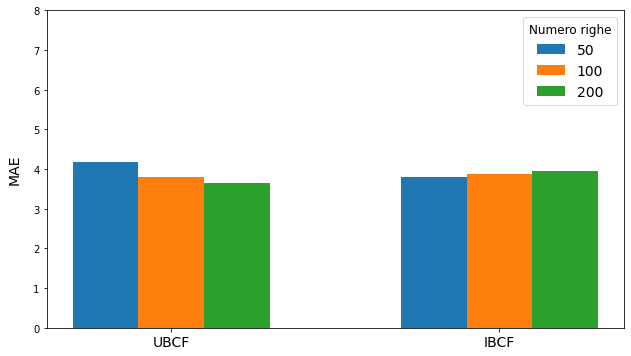

In [22]:
bounds = [0,8]
plot_tempi_esecuzione(complete_mae, bounds, "./plot/mae-error.png")

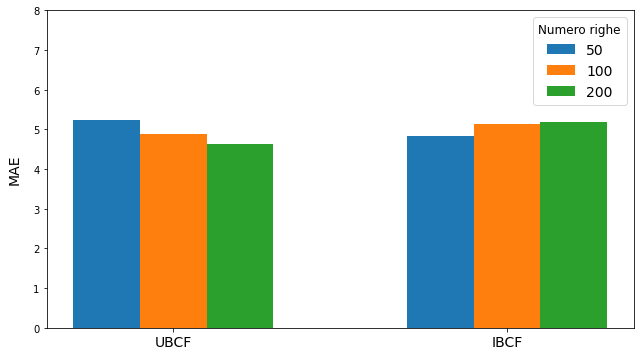

In [23]:
bounds = [0,8]
plot_tempi_esecuzione(complete_rmse, bounds, "./plot/rmse-error.png")